In [1]:
from pathlib import Path

affectnet_occluded_path = Path(r'/home/thor/Desktop/datasets/affectnet/affectnet7-occluded-for-balanced-sampling')
affectnet_training_set_path = affectnet_occluded_path / 'training_set'
affectnet_training_set_path_neutral = affectnet_training_set_path / '0'
affectnet_training_set_path_happy = affectnet_training_set_path / '1'
affectnet_training_set_path_sad = affectnet_training_set_path / '2'
affectnet_training_set_path_surprise = affectnet_training_set_path / '3'
affectnet_training_set_path_fear = affectnet_training_set_path / '4'
affectnet_training_set_path_disgust = affectnet_training_set_path / '5'
affectnet_training_set_path_anger = affectnet_training_set_path / '6'

affectnet_validation_set_path = affectnet_occluded_path / 'validation_set'
affectnet_test_set_path = affectnet_occluded_path / 'test_set'

emojihero_path = Path(r'/home/thor/Desktop/datasets/emoji-hero')
emojihero_training_set_path = emojihero_path / 'training_set'
emojihero_validation_set_path = emojihero_path / 'validation_set'
emojihero_test_set_path = emojihero_path / 'test_set'

id_to_emotion = {
    0: 'Neutral',
    1: 'Happy',
    2: 'Sad',
    3: 'Surprise',
    4: 'Fear',
    5: 'Disgust',
    6: 'Anger',
}


In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = (224, 224)
SEED = 42

In [3]:
def compute_class_frequencies(dataset_path: Path) -> dict:
    class_frequencies = {}
    for class_dir in sorted(dataset_path.iterdir()):
        num_files = sum(1 for _ in class_dir.iterdir())
        class_id = int(class_dir.name)
        class_frequencies[class_id] = num_files
        print(f'{class_id} - {id_to_emotion[class_id]:<9} : {num_files:>8} images')

    return class_frequencies


In [4]:
import keras

print('---EMOJI-HERO---')
print('---TRAINING SET---')
emojihero_training_set = keras.preprocessing.image_dataset_from_directory(emojihero_training_set_path,
                                                                          batch_size=BATCH_SIZE,
                                                                          image_size=IMAGE_SIZE,
                                                                          shuffle=True,
                                                                          seed=SEED)

class_frequencies = compute_class_frequencies(emojihero_training_set_path)

print('---VALIDATION SET---')
emojihero_validation_set = keras.preprocessing.image_dataset_from_directory(emojihero_validation_set_path,
                                                                            batch_size=BATCH_SIZE,
                                                                            image_size=IMAGE_SIZE,
                                                                            shuffle=True,
                                                                            seed=SEED)

compute_class_frequencies(emojihero_validation_set_path)

2024-03-21 09:56:20.713261: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-21 09:56:20.734340: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-21 09:56:20.734360: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-21 09:56:20.734904: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-21 09:56:20.738444: I tensorflow/core/platform/cpu_feature_guar

---EMOJI-HERO---
---TRAINING SET---
Found 2030 files belonging to 7 classes.


2024-03-21 09:56:21.573270: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-21 09:56:21.593081: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-21 09:56:21.593204: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

0 - Neutral   :      414 images
1 - Happy     :      400 images
2 - Sad       :      274 images
3 - Surprise  :      360 images
4 - Fear      :      220 images
5 - Disgust   :      212 images
6 - Anger     :      150 images
---VALIDATION SET---
Found 770 files belonging to 7 classes.
0 - Neutral   :      110 images
1 - Happy     :      110 images
2 - Sad       :      110 images
3 - Surprise  :      110 images
4 - Fear      :      110 images
5 - Disgust   :      110 images
6 - Anger     :      110 images


{0: 110, 1: 110, 2: 110, 3: 110, 4: 110, 5: 110, 6: 110}

In [5]:
total_num_samples = sum(class_frequencies.values())
inverse_class_frequencies = {class_id: 1 / (frequency / total_num_samples) for class_id, frequency in
                             class_frequencies.items()}

total_inverse_class_frequencies = sum(inverse_class_frequencies.values())
class_weights = {class_id: freq / total_inverse_class_frequencies for class_id, freq in
                 inverse_class_frequencies.items()}

print(class_weights)

{0: 0.08856927366991273, 1: 0.09166919824835967, 2: 0.13382364707789735, 3: 0.10185466472039963, 4: 0.1666712695424721, 5: 0.1729607514119994, 6: 0.2444511953289591}


In [6]:
from tensorflow.data import Dataset

print('---AFFECTNET-occl---')

neutral_set = keras.preprocessing.image_dataset_from_directory(affectnet_training_set_path_neutral,
                                                               batch_size=BATCH_SIZE,
                                                               image_size=IMAGE_SIZE,
                                                               shuffle=True,
                                                               seed=SEED)
happy_set = keras.preprocessing.image_dataset_from_directory(affectnet_training_set_path_happy,
                                                             batch_size=BATCH_SIZE,
                                                             image_size=IMAGE_SIZE,
                                                             shuffle=True,
                                                             seed=SEED)
sad_set = keras.preprocessing.image_dataset_from_directory(affectnet_training_set_path_sad,
                                                           batch_size=BATCH_SIZE,
                                                           image_size=IMAGE_SIZE,
                                                           shuffle=True,
                                                           seed=SEED)
surprise_set = keras.preprocessing.image_dataset_from_directory(affectnet_training_set_path_surprise,
                                                                batch_size=BATCH_SIZE,
                                                                image_size=IMAGE_SIZE,
                                                                shuffle=True,
                                                                seed=SEED)
fear_set = keras.preprocessing.image_dataset_from_directory(affectnet_training_set_path_fear,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMAGE_SIZE,
                                                            shuffle=True,
                                                            seed=SEED)
disgust_set = keras.preprocessing.image_dataset_from_directory(affectnet_training_set_path_disgust,
                                                               batch_size=BATCH_SIZE,
                                                               image_size=IMAGE_SIZE,
                                                               shuffle=True,
                                                               seed=SEED)
anger_set = keras.preprocessing.image_dataset_from_directory(affectnet_training_set_path_anger,
                                                             batch_size=BATCH_SIZE,
                                                             image_size=IMAGE_SIZE,
                                                             shuffle=True,
                                                             seed=SEED)

sampling_weights = [num_samples / total_num_samples for class_id, num_samples in class_frequencies.items()]
print(sampling_weights)

balanced_affectnet_training_set = Dataset.sample_from_datasets(
    [neutral_set, happy_set, sad_set, surprise_set, fear_set, disgust_set, anger_set],
    weights=sampling_weights,
    seed=SEED,
    stop_on_empty_dataset=True,
    rerandomize_each_iteration=True).repeat()

---AFFECTNET-occl---
Found 74494 files belonging to 7 classes.
Found 134035 files belonging to 7 classes.
Found 25079 files belonging to 7 classes.
Found 13710 files belonging to 7 classes.
Found 5998 files belonging to 7 classes.
Found 3423 files belonging to 7 classes.
Found 24502 files belonging to 7 classes.
[0.20394088669950738, 0.19704433497536947, 0.13497536945812807, 0.17733990147783252, 0.10837438423645321, 0.10443349753694581, 0.07389162561576355]


In [7]:
from tensorflow.data import Dataset

dataset_weights = [0.2, 0.8]
combined_training_set = Dataset.sample_from_datasets(
    [balanced_affectnet_training_set, emojihero_training_set],
    weights=dataset_weights,
    seed=SEED,
    stop_on_empty_dataset=True,
    rerandomize_each_iteration=True).repeat()

In [8]:
# print('---AFFECTNET-occl---')
# print('---VALIDATION SET---')
# affectnet_validation_set = keras.preprocessing.image_dataset_from_directory(affectnet_validation_set_path,
#                                                                             batch_size=BATCH_SIZE,
#                                                                             image_size=IMAGE_SIZE,
#                                                                             shuffle=True,
#                                                                             seed=SEED)
# 
# compute_class_frequencies(affectnet_validation_set_path)


In [9]:
# combined_validation_set = Dataset.sample_from_datasets([affectnet_validation_set, emojihero_validation_set])

In [10]:
from keras import layers
from keras.models import Sequential

data_augmentation = Sequential([
    layers.RandomFlip(mode="horizontal"),
    layers.RandomTranslation(height_factor=0.05, width_factor=0.05, fill_mode="constant"),
    layers.RandomRotation(0.1, fill_mode="constant"),
    layers.RandomZoom(0.1, fill_mode="constant"),
    layers.RandomContrast(0.1),
    layers.RandomBrightness(0.1)
])

inputs = layers.Input(shape=(*IMAGE_SIZE, 3))
x = data_augmentation(inputs)


In [11]:
from keras.src.applications import EfficientNetB0


def build_model(num_classes, inputs_layer):
    model = EfficientNetB0(include_top=False, input_tensor=inputs_layer, weights="imagenet")

    # Freeze the pretrained weights
    # model.trainable = False

    # Rebuild top
    x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
    x = layers.Dropout(0.2, name="top_dropout1")(x)
    outputs = layers.Dense(num_classes, activation="softmax", name="pred")(x)

    # Compile
    model = keras.Model(inputs, outputs, name="EfficientNet")
    return model


model = build_model(len(class_frequencies), x)
model.summary()

Model: "EfficientNet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 sequential (Sequential)     (None, 224, 224, 3)          0         ['input_1[0][0]']             
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['sequential[0][0]']          
                                                                                                  
 normalization (Normalizati  (None, 224, 224, 3)          7         ['rescaling[0][0]']           
 on)                                                                                   

In [12]:
# from tensorflow.keras.models import load_model
# 
# model = load_model(r'/home/thor/Desktop/repos/emoji-hero-baseline/affectnet_transfer_imagenet_checkpoints_20240310-2241/best_model_phase_4.keras')
# 
# for layer in model.layers[:-167]:
#     layer.trainable = False
# 
# model.summary()

In [13]:
# num_layers = len(model.layers)
# for i, layer in enumerate(model.layers):
#     print((num_layers - i), layer.name, layer.__class__.__name__)

In [14]:
# def unfreeze_model(model, num_layers):
#     for layer in model.layers[-num_layers:]:
#         if not isinstance(layer, layers.BatchNormalization):
#             layer.trainable = True

In [15]:
import datetime
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

timestamp = datetime.datetime.now().strftime("%Y%m%d-%H%M")
checkpoint_dir = Path(f"affectnet_occluded_and_emojihero_transfer_imagenet_checkpoints_{timestamp}")
training_histories = []
epoch_counter = 0
start_phase = 0
epochs_per_phase = [20, 16, 10]
learning_rate_per_phase = [1e-3, 1e-4, 1e-5]

steps_per_epoch = (total_num_samples + total_num_samples * (
        dataset_weights[0] / dataset_weights[1])) // BATCH_SIZE

for phase in range(start_phase, len(epochs_per_phase)):
    epochs = epochs_per_phase[phase]
    learning_rate = learning_rate_per_phase[phase]

    print(f'\n---STARTING TRAINING PHASE {phase}')
    print(f'EPOCHS:{epochs} LEARNING_RATE:{learning_rate}')
    checkpoint_filepath = str(checkpoint_dir / f'best_model_phase_{phase}.keras')

    model_checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath,
                                                save_weights_only=False,
                                                monitor='val_accuracy',
                                                mode='max',
                                                save_best_only=True)

    old_checkpoint_filepath = checkpoint_filepath.replace(f'phase_{phase}', f'phase_{phase - 1}')
    if Path(old_checkpoint_filepath).exists():
        print(f'Loading model from {old_checkpoint_filepath}')
        model = load_model(old_checkpoint_filepath)

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer,
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

    hist = model.fit(combined_training_set,
                     epochs=epoch_counter + epochs,
                     steps_per_epoch=steps_per_epoch,
                     validation_data=emojihero_validation_set,
                     class_weight=class_weights,
                     callbacks=[model_checkpoint_callback],
                     initial_epoch=epoch_counter)

    epoch_counter += epochs
    training_histories.append(hist)


---STARTING TRAINING PHASE 0
EPOCHS:20 LEARNING_RATE:0.001
Epoch 1/20


2024-03-21 09:56:36.458597: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inEfficientNet/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2024-03-21 09:56:37.954577: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-03-21 09:56:37.995978: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-03-21 09:56:38.551420: I external/local_xla/xla/service/service.cc:168] XLA service 0xe1c64a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-21 09:56:38.551440: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2024-03-21 09:56:38.554582: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash repr

79/79 [==============================] - 30s 121ms/step - loss: 0.2190 - accuracy: 0.3493 - val_loss: 1.2668 - val_accuracy: 0.5013
Epoch 2/20
79/79 [==============================] - 9s 109ms/step - loss: 0.1534 - accuracy: 0.5880 - val_loss: 1.3166 - val_accuracy: 0.5247
Epoch 3/20
79/79 [==============================] - 8s 107ms/step - loss: 0.1447 - accuracy: 0.6092 - val_loss: 1.1712 - val_accuracy: 0.5649
Epoch 4/20
79/79 [==============================] - 8s 107ms/step - loss: 0.1251 - accuracy: 0.6825 - val_loss: 1.8138 - val_accuracy: 0.5662
Epoch 5/20
79/79 [==============================] - 8s 107ms/step - loss: 0.1259 - accuracy: 0.6398 - val_loss: 1.1171 - val_accuracy: 0.6286
Epoch 6/20
79/79 [==============================] - 8s 107ms/step - loss: 0.1084 - accuracy: 0.6829 - val_loss: 1.0379 - val_accuracy: 0.6351
Epoch 7/20
79/79 [==============================] - 8s 103ms/step - loss: 0.1256 - accuracy: 0.6598 - val_loss: 1.0458 - val_accuracy: 0.6013
Epoch 8/20
79/79

2024-03-21 09:59:53.650694: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inEfficientNet/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


79/79 [==============================] - 27s 118ms/step - loss: 0.0708 - accuracy: 0.8028 - val_loss: 0.7672 - val_accuracy: 0.7182
Epoch 22/36
79/79 [==============================] - 8s 107ms/step - loss: 0.0617 - accuracy: 0.8080 - val_loss: 0.7325 - val_accuracy: 0.7377
Epoch 23/36
79/79 [==============================] - 8s 102ms/step - loss: 0.0796 - accuracy: 0.7538 - val_loss: 0.7281 - val_accuracy: 0.7312
Epoch 24/36
79/79 [==============================] - 8s 103ms/step - loss: 0.0733 - accuracy: 0.7888 - val_loss: 0.8073 - val_accuracy: 0.7169
Epoch 25/36
79/79 [==============================] - 8s 102ms/step - loss: 0.0526 - accuracy: 0.8391 - val_loss: 0.7871 - val_accuracy: 0.7299
Epoch 26/36
79/79 [==============================] - 8s 103ms/step - loss: 0.0596 - accuracy: 0.8124 - val_loss: 0.8047 - val_accuracy: 0.7247
Epoch 27/36
79/79 [==============================] - 8s 104ms/step - loss: 0.0530 - accuracy: 0.8394 - val_loss: 0.7943 - val_accuracy: 0.7299
Epoch 28/3

2024-03-21 10:02:26.310492: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:11: Filling up shuffle buffer (this may take a while): 1 of 256
2024-03-21 10:02:26.318799: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


79/79 [==============================] - 30s 385ms/step - loss: 0.0604 - accuracy: 0.8267 - val_loss: 0.8479 - val_accuracy: 0.7455
Epoch 36/36
79/79 [==============================] - 8s 100ms/step - loss: 0.0684 - accuracy: 0.7904 - val_loss: 0.8610 - val_accuracy: 0.7299

---STARTING TRAINING PHASE 2
EPOCHS:10 LEARNING_RATE:1e-05
Loading model from affectnet_occluded_and_emojihero_transfer_imagenet_checkpoints_20240321-0956/best_model_phase_1.keras
Epoch 37/46


2024-03-21 10:02:56.314538: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inEfficientNet/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


79/79 [==============================] - 27s 115ms/step - loss: 0.0512 - accuracy: 0.8566 - val_loss: 0.8680 - val_accuracy: 0.7494
Epoch 38/46
79/79 [==============================] - 8s 100ms/step - loss: 0.0445 - accuracy: 0.8474 - val_loss: 0.8656 - val_accuracy: 0.7468
Epoch 39/46
79/79 [==============================] - 8s 101ms/step - loss: 0.0374 - accuracy: 0.8749 - val_loss: 0.8697 - val_accuracy: 0.7377
Epoch 40/46
79/79 [==============================] - 8s 100ms/step - loss: 0.0429 - accuracy: 0.8888 - val_loss: 0.8669 - val_accuracy: 0.7377
Epoch 41/46
79/79 [==============================] - 8s 101ms/step - loss: 0.0490 - accuracy: 0.8705 - val_loss: 0.8694 - val_accuracy: 0.7364
Epoch 42/46
79/79 [==============================] - 8s 101ms/step - loss: 0.0421 - accuracy: 0.8697 - val_loss: 0.8748 - val_accuracy: 0.7364
Epoch 43/46
79/79 [==============================] - 8s 100ms/step - loss: 0.0660 - accuracy: 0.8120 - val_loss: 0.8542 - val_accuracy: 0.7429
Epoch 44/4

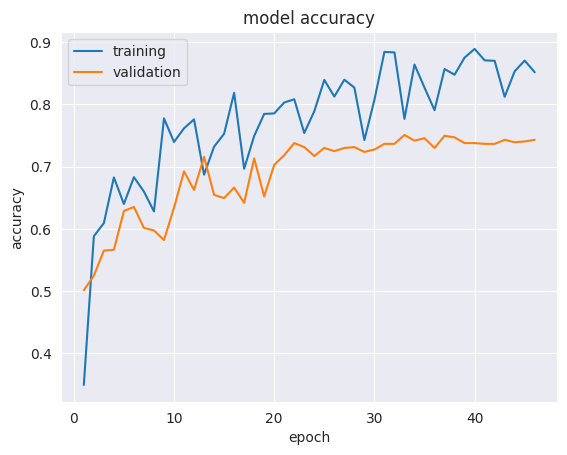

In [16]:
import matplotlib.pyplot as plt


def plot_and_save_combined_history(hists, checkpoint_dir):
    acc = []
    val_acc = []

    for hist in hists:
        acc += hist.history["accuracy"]
        val_acc += hist.history["val_accuracy"]

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, label="training")
    plt.plot(epochs, val_acc, label="validation")
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(loc="upper left")

    plt.savefig(str(checkpoint_dir / 'training_history.png'))

    plt.show()


plot_and_save_combined_history(training_histories, checkpoint_dir)

In [17]:
import csv


def save_training_history_csv(hists, checkpoint_dir):
    acc = []
    val_acc = []
    for hist in hists:
        acc.extend(hist.history["accuracy"])
        val_acc.extend(hist.history["val_accuracy"])

    epochs = range(1, len(acc) + 1)

    # CSV-Datei schreiben
    with (checkpoint_dir / 'training_history.csv').open(mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['epoch', 'accuracy', 'val_accuracy'])
        for epoch, accuracy, val_accuracy in zip(epochs, acc, val_acc):
            writer.writerow([epoch, accuracy, val_accuracy])


save_training_history_csv(training_histories, checkpoint_dir)

In [18]:
best_checkpoint = str(checkpoint_dir / "best_model_phase_2.keras")
model = load_model(best_checkpoint)

In [19]:
print('\n---AFFECTNET---')
print('---TEST SET---')
affectnet_test_set = keras.preprocessing.image_dataset_from_directory(affectnet_test_set_path,
                                                                      batch_size=BATCH_SIZE,
                                                                      image_size=IMAGE_SIZE,
                                                                      shuffle=False)
compute_class_frequencies(affectnet_test_set_path)



---AFFECTNET---
---TEST SET---
Found 3500 files belonging to 7 classes.
0 - Neutral   :      500 images
1 - Happy     :      500 images
2 - Sad       :      500 images
3 - Surprise  :      500 images
4 - Fear      :      500 images
5 - Disgust   :      500 images
6 - Anger     :      500 images


{0: 500, 1: 500, 2: 500, 3: 500, 4: 500, 5: 500, 6: 500}

In [20]:
affectnet_test_loss, affectnet_test_acc = model.evaluate(affectnet_test_set)
print(f"Test accuracy: {affectnet_test_acc}")

110/110 [==============================] - 4s 24ms/step - loss: 2.4758 - accuracy: 0.2017
Test accuracy: 0.20171429216861725


In [21]:
print('\n---EMOJIHERO---')
print('---TEST SET---')
emojihero_test_set = keras.preprocessing.image_dataset_from_directory(emojihero_test_set_path,
                                                                      batch_size=BATCH_SIZE,
                                                                      image_size=IMAGE_SIZE,
                                                                      shuffle=False)
compute_class_frequencies(emojihero_test_set_path)


---EMOJIHERO---
---TEST SET---
Found 756 files belonging to 7 classes.
0 - Neutral   :      108 images
1 - Happy     :      108 images
2 - Sad       :      108 images
3 - Surprise  :      108 images
4 - Fear      :      108 images
5 - Disgust   :      108 images
6 - Anger     :      108 images


{0: 108, 1: 108, 2: 108, 3: 108, 4: 108, 5: 108, 6: 108}

In [22]:
emojihero_test_loss, emojihero_test_acc = model.evaluate(emojihero_test_set)
print(f"Test accuracy: {emojihero_test_acc}")

24/24 [==============================] - 1s 26ms/step - loss: 0.8834 - accuracy: 0.7474
Test accuracy: 0.7473545074462891


In [23]:
import numpy as np
from sklearn.metrics import classification_report

affectnet_y_pred_vectors = model.predict(affectnet_test_set)
affectnet_y_pred = np.argmax(affectnet_y_pred_vectors, axis=1)
affectnet_y_true = np.concatenate([y for _, y in affectnet_test_set], axis=0)

affectnet_report = classification_report(affectnet_y_true, affectnet_y_pred, target_names=id_to_emotion.values(),
                                         digits=4)
print(affectnet_report)

110/110 [==============================] - 3s 24ms/step
              precision    recall  f1-score   support

     Neutral     0.1920    0.0480    0.0768       500
       Happy     0.3307    0.5040    0.3994       500
         Sad     0.2213    0.0540    0.0868       500
    Surprise     0.4524    0.0380    0.0701       500
        Fear     0.3750    0.0060    0.0118       500
     Disgust     0.1522    0.6640    0.2477       500
       Anger     0.1885    0.0980    0.1289       500

    accuracy                         0.2017      3500
   macro avg     0.2732    0.2017    0.1459      3500
weighted avg     0.2732    0.2017    0.1459      3500


[[ 24  97  20   1   0 307  51]
 [  4 252   9   3   0 212  20]
 [ 33  92  27   2   1 296  49]
 [  9  86   4  19   1 351  30]
 [ 17  61  15   9   3 357  38]
 [ 17 102  23   3   0 332  23]
 [ 21  72  24   5   3 326  49]]


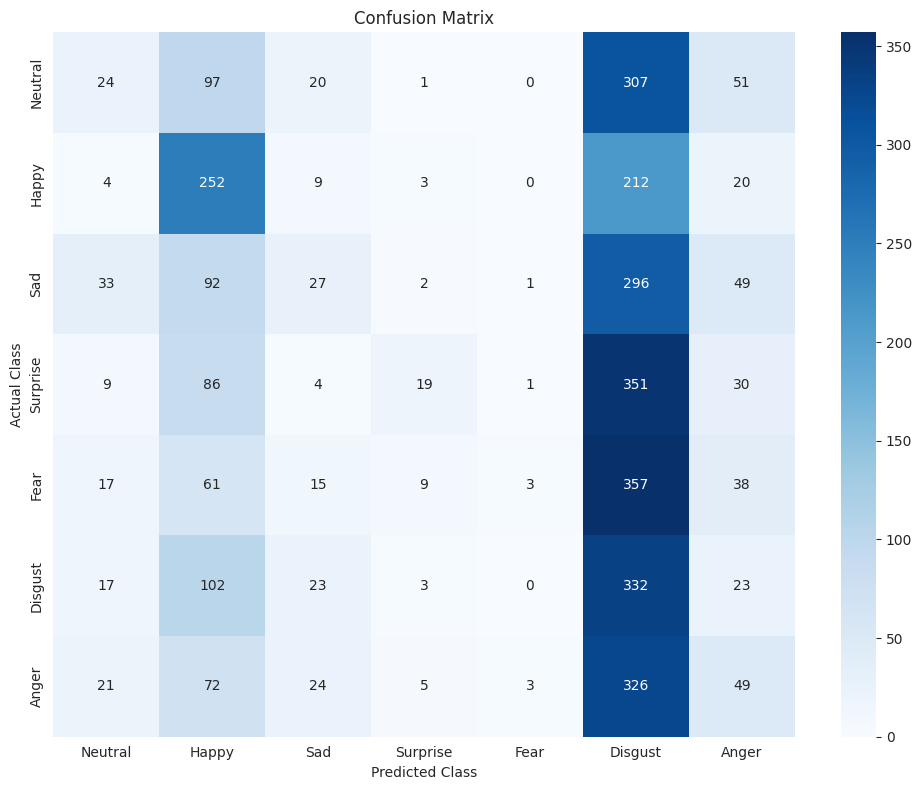

In [24]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


def plot_confusion_matrix(y_true, y_pred):
    class_names = id_to_emotion.values()

    cm = confusion_matrix(y_true, y_pred)
    print(cm)

    fig = plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Class')
    plt.ylabel('Actual Class')
    plt.tight_layout()
    plt.show()

    return fig


affectnet_cm_figure = plot_confusion_matrix(affectnet_y_true, affectnet_y_pred)


In [25]:
def save_evaluation_results(report, cm_figure, checkpoint_dir, dataset_name):
    with (checkpoint_dir / f'{dataset_name}_classification_report.txt').open(mode='w') as f:
        f.write(report)
    cm_figure.savefig(str(checkpoint_dir / f'{dataset_name}_confusion_matrix.png'))


save_evaluation_results(affectnet_report, affectnet_cm_figure, checkpoint_dir, 'affectnet')

In [26]:
emojihero_y_pred_vectors = model.predict(emojihero_test_set)
emojihero_y_pred = np.argmax(emojihero_y_pred_vectors, axis=1)
emojihero_y_true = np.concatenate([y for _, y in emojihero_test_set], axis=0)

emojihero_report = classification_report(emojihero_y_true, emojihero_y_pred, target_names=id_to_emotion.values(),
                                         digits=4)
print(emojihero_report)

24/24 [==============================] - 1s 25ms/step
              precision    recall  f1-score   support

     Neutral     0.8037    0.7963    0.8000       108
       Happy     0.7429    0.9630    0.8387       108
         Sad     0.8571    0.7222    0.7839       108
    Surprise     0.8519    0.8519    0.8519       108
        Fear     0.7765    0.6111    0.6839       108
     Disgust     0.6129    0.7037    0.6552       108
       Anger     0.6238    0.5833    0.6029       108

    accuracy                         0.7474       756
   macro avg     0.7527    0.7474    0.7452       756
weighted avg     0.7527    0.7474    0.7452       756


[[ 86   5   3   1   2   3   8]
 [  1 104   0   0   1   1   1]
 [  6   0  78   0   0   6  18]
 [  1   0   0  92  11   2   2]
 [  8  10   1  13  66   9   1]
 [  2  11   5   2   4  76   8]
 [  3  10   4   0   1  27  63]]


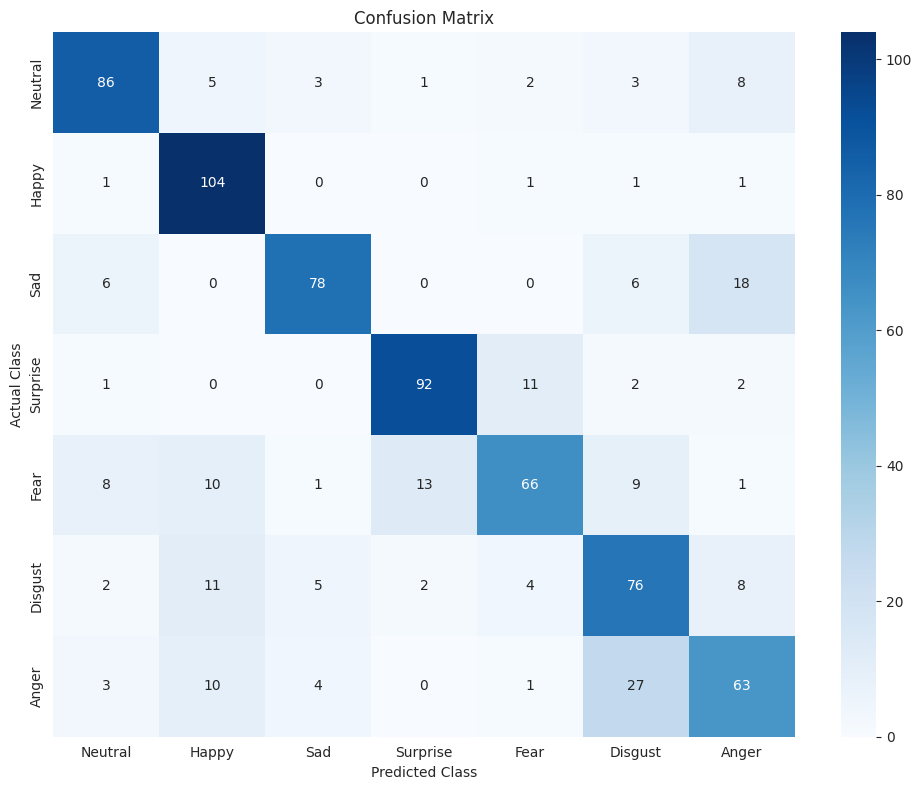

In [27]:
emojihero_cm_figure = plot_confusion_matrix(emojihero_y_true, emojihero_y_pred)

In [28]:
save_evaluation_results(emojihero_report, emojihero_cm_figure, checkpoint_dir, 'emojihero')

In [29]:
import shutil

path_to_this_notebook = Path(
    '/home/thor/Desktop/repos/emoji-hero-baseline/affectnet_occluded_and_emojihero_transfer_imagenet.ipynb')

shutil.copy2(path_to_this_notebook, (checkpoint_dir / path_to_this_notebook.name))

PosixPath('affectnet_occluded_and_emojihero_transfer_imagenet_checkpoints_20240321-0956/affectnet_occluded_and_emojihero_transfer_imagenet.ipynb')